<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
len(df)

156

In [5]:
df.dropna(subset = ['Freedom', 'Positive affect'], axis = 0, inplace = True)

In [6]:
len(df)

155

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

_Распределение, похоже, равномерное.  То есть свобода и ощущение счасться не зависят от страны_.

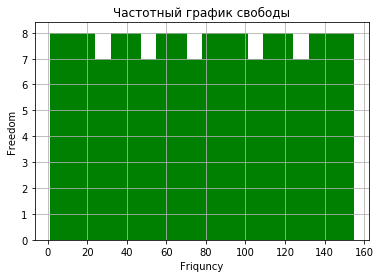

In [7]:
n, bins, patches = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('Friquncy')
plt.ylabel('Freedom')
plt.title('Частотный график свободы')
plt.grid(True)
plt.show()

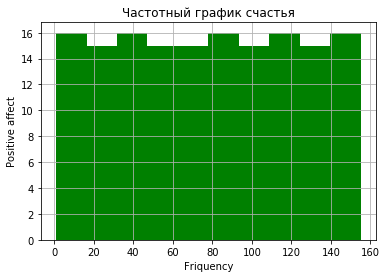

In [8]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('Friquency')
plt.ylabel('Positive affect')
plt.title('Частотный график счастья')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Почему нельзя найти моду?

_Распределение равномерное, следовательно нет или иало повторяющихся элементов.  Поэтому моду вычислить невозможно._ 

In [9]:
print('Медиана = ', statistics.median(df['Freedom']))
print('Среднее значение / матожидание = ', df['Freedom'].mean())
print('Максимум - Минимум = размах = ', df['Freedom'].max() , ' - ',df['Freedom'].min(), ' = ',
     df['Freedom'].max() - df['Freedom'].min())
print('Ср.кв. отклонение = ', statistics.pstdev(df['Freedom']))
print('Дисперсия = ', statistics.pvariance(df['Freedom']))

Медиана =  78.0
Среднее значение / матожидание =  78.0
Максимум - Минимум = размах =  155.0  -  1.0  =  154.0
Ср.кв. отклонение =  44.74371464239419
Дисперсия =  2002.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

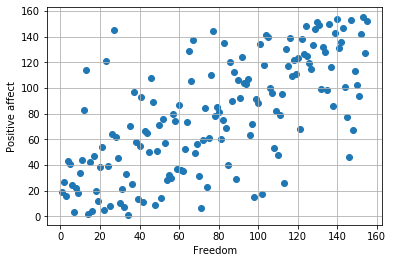

In [10]:
fig, ax = plt.subplots()
ax.scatter(df['Freedom'], df['Positive affect'])
ax.grid(True)
plt.ylabel('Positive affect')
plt.xlabel('Freedom')
plt.show()

In [11]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Freedom'], df['Positive affect'])
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6817698430601656


_Коэффициент корреляции Пирсона положительный, следоваттельно в данных есть прямо пропорциональная зависимость, но не очень сильная.  Продемонстрируем на следующем графике_

In [12]:
import seaborn as sns

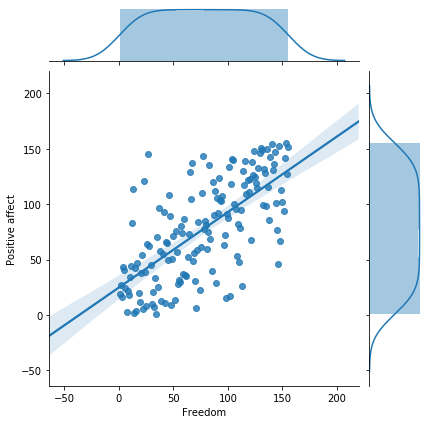

In [13]:
sns.jointplot(x='Freedom', y='Positive affect', 
              data=df, kind='reg')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0
0  0.025974
1  0.032468
2  0.012987
3  0.038961
4  0.116883


Построить матрицу корреляций для всех колонок таблицы

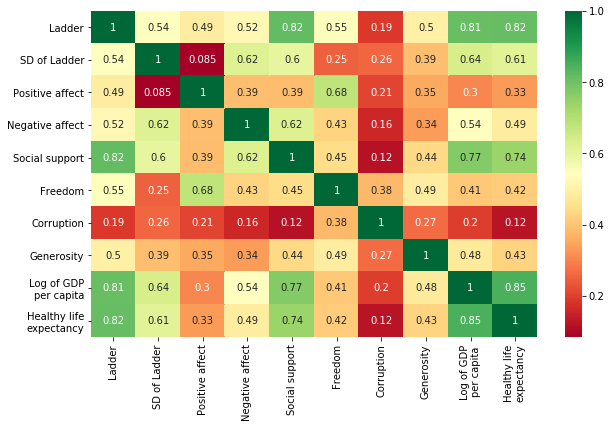

In [15]:
ax = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') 
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

_Значительая корреляция наблюдается между данными **Log of GDP per Capita** и __Ladder, Social support и Healthy life__, что вообщем то очевидно: в странах с высоким показателем GDP как правило сильно работают программы социальной поддержки, люди имеют возможность и желание вести здоровый образ жизни, а также работают социальные лестницы._

Загрузить таблицу цен на авокадо: 

In [63]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

_Близко к нормальному_

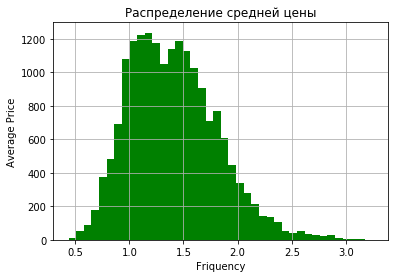

In [64]:
n, bins, patches = plt.hist(df['AveragePrice'], 40, facecolor='g')

plt.xlabel('Friquency')
plt.ylabel('Average Price')
plt.title('Распределение средней цены')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

_Сильно коррелируют между собой столбцы 4046, 4225, 4770.  Видимо, это разные типы авокадо в партии.  Тогда коррелируют они потому, что их объемы в поставке стараются сделать пропорциональными.  Но ни одна из этих колонок не коррелирует с AveragePrice._

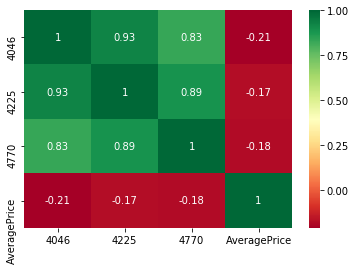

<Figure size 720x720 with 0 Axes>

In [65]:
df_subset = df[['4046', '4225', '4770', 'AveragePrice']]
ax = sns.heatmap(df_subset.corr(),annot=True, cmap='RdYlGn') 
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.figure(figsize=(10,10))
plt.show()

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [66]:
PREDICTION_TYPE = 'organic'
PREDICTING_FOR = "LasVegas"
date_price = df[(df.type == PREDICTION_TYPE) & (df.region == PREDICTING_FOR)][['Date', 'AveragePrice']]

(array([735719., 735842., 735964., 736085., 736208., 736330., 736450.,
        736573., 736695.]), <a list of 9 Text xticklabel objects>)

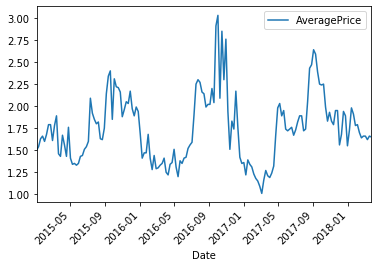

In [67]:
date_price.plot(x='Date', y='AveragePrice', kind="line")
plt.xticks(rotation = 45)

In [68]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [69]:
date_price = date_price.sort_values(by='ds')

In [70]:
amount_80 = int(len(date_price)*0.8)
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]

In [71]:
date_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 10269 to 17853
Data columns (total 2 columns):
ds    169 non-null datetime64[ns]
y     169 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [72]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Посчитаем, насколько дней вперед надо сделать предсказания

In [73]:
train_price.tail()

,ds,y
15880,2017-07-02,1.73
15879,2017-07-09,1.82
15878,2017-07-16,1.89
15877,2017-07-23,1.89
15876,2017-07-30,1.72


In [74]:
test_price.tail()

,ds,y
17857,2018-02-25,1.66
17856,2018-03-04,1.66
17855,2018-03-11,1.62
17854,2018-03-18,1.66
17853,2018-03-25,1.65


In [75]:
future = m.make_future_dataframe(periods=238)
forecast = m.predict(future)

In [76]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.784335,1.206697,1.784942,1.784335,1.784335,-0.279664,-0.279664,-0.279664,-0.279664,-0.279664,-0.279664,0.0,0.0,0.0,1.504671
1,2015-01-11,1.783767,1.235687,1.798707,1.783767,1.783767,-0.285272,-0.285272,-0.285272,-0.285272,-0.285272,-0.285272,0.0,0.0,0.0,1.498495
2,2015-01-18,1.783200,1.223399,1.816135,1.783200,1.783200,-0.278061,-0.278061,-0.278061,-0.278061,-0.278061,-0.278061,0.0,0.0,0.0,1.505138
3,2015-01-25,1.782632,1.212935,1.797885,1.782632,1.782632,-0.275836,-0.275836,-0.275836,-0.275836,-0.275836,-0.275836,0.0,0.0,0.0,1.506796
4,2015-02-01,1.782064,1.225912,1.790375,1.782064,1.782064,-0.276095,-0.276095,-0.276095,-0.276095,-0.276095,-0.276095,0.0,0.0,0.0,1.505969


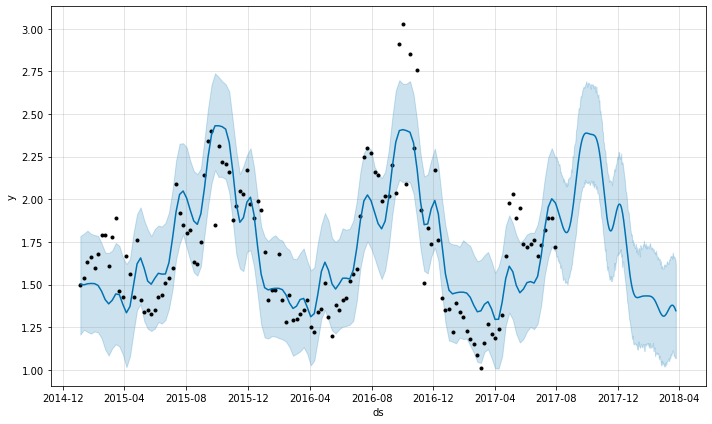

In [77]:
fig1 = m.plot(forecast)

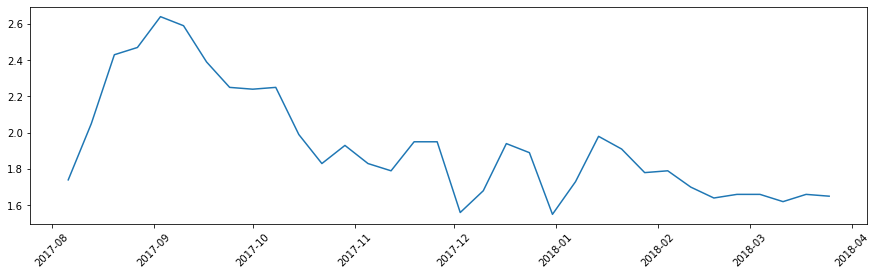

In [78]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.xticks(rotation = 45)
plt.show()

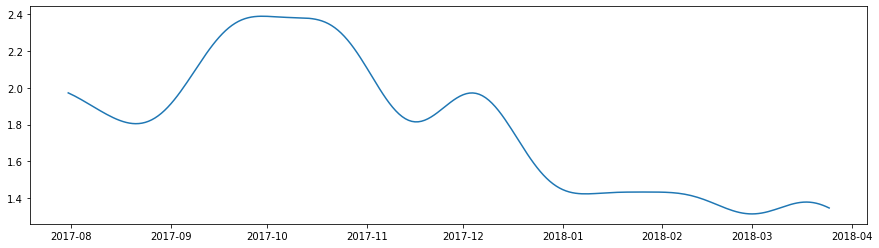

In [79]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

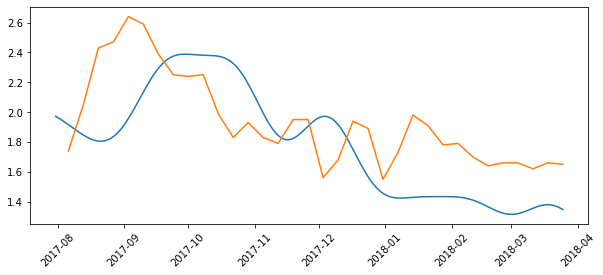

In [80]:
plt.figure(figsize=(10,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.xticks(rotation = 45)
plt.show()

Ну так нормальненько...   Но не очень.  Домашнюю работу пора сдавать, но я потом попробую еще другими модельками поапроксимировать.  